In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [302]:
fashion1 = pd.read_csv('../data604/fashion_mnist/fashion-mnist_train.csv')
fashion2 = pd.read_csv('../data604/fashion_mnist/fashion-mnist_test.csv')

In [303]:
fashion_data = fashion1.append(fashion2, ignore_index=True)

In [304]:
fashion_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


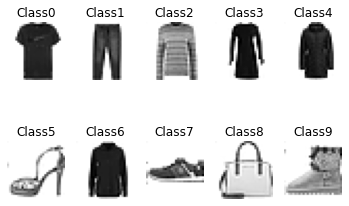

In [327]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    image = fashion_data.loc[fashion_data['label']==i].to_numpy()[1,:784].reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.title('Class'+str(i))
    plt.show

In [305]:
labels = fashion_data['label'].copy()
fashion_df = fashion_data.drop(columns=['label'])

In [306]:
#fit the pca model with the data
pca = PCA()
pca.fit(fashion_df)
pca_arr = pca.transform(fashion_df)

In [291]:
#representation of the data in the principal component space, score in Matlab
pca_arr

array([[ 9.36255854e+02,  1.26669485e+03, -2.39030153e+01, ...,
        -6.68914652e-02,  2.53363974e-03,  1.22155649e-02],
       [-1.12007566e+03,  9.80652313e+02, -5.02135991e+02, ...,
         1.24722786e-02, -1.09813367e-02, -8.30646685e-04],
       [ 1.85053923e+03,  4.06831879e+02,  5.88411359e+02, ...,
        -9.31417673e-03,  1.35520015e-02,  1.66789670e-02],
       ...,
       [ 2.72765050e+02,  9.96359754e+02,  4.53276750e+01, ...,
        -3.34449854e-02,  7.75864210e-03,  9.54562200e-03],
       [ 1.55782908e+03,  1.32772263e+03, -3.30628391e+01, ...,
         7.38798912e-01, -5.79553937e-01, -2.64697463e-02],
       [ 1.95232537e+03,  1.33150348e+02,  3.61646969e+02, ...,
        -2.71074678e-02,  4.35060239e-02, -8.34085575e-03]])

In [287]:
pca_arr.shape

(70000, 784)

In [286]:
np.mean(pca_arr,axis=1)

array([ 6.06313212, -3.16968311,  4.98903499, ...,  2.73257212,
        3.72100719,  5.73227885])

In [14]:
#eigenvectors of the data, coeff in Matlab
pca_comp = pca.components_

Text(0.5, 1.0, 'First Principal Components')

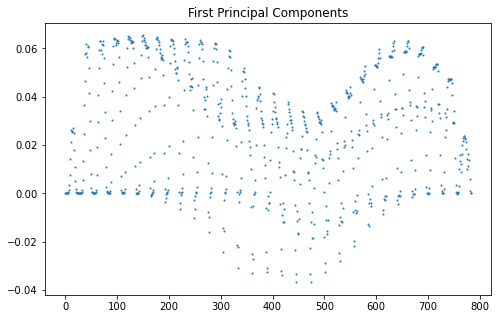

In [198]:
max_var = pca_comp[0]
x=range(0,784)
fig = plt.figure(figsize = (8, 5))
plt.scatter(x,max_var,s=1)
plt.title('First Principal Components')

Text(0.5, 1.0, 'Last Principal Components')

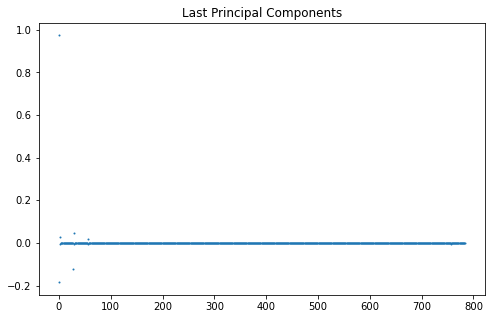

In [199]:
min_var = pca_comp[-1]
x=range(0,784)
fig = plt.figure(figsize = (8, 5))
plt.scatter(x,min_var,s=1)
plt.title('Last Principal Components')

In [322]:
new_basis = np.dot(pca_arr, pca_comp)

In [323]:
new_basis

array([[-8.28571429e-04, -6.74285714e-03, -3.77285714e-02, ...,
        -2.72305714e+00, -8.23228571e-01, -6.95857143e-02],
       [-8.28571429e-04, -6.74285714e-03, -3.77285714e-02, ...,
        -2.72305714e+00, -8.23228571e-01, -6.95857143e-02],
       [-8.28571429e-04, -6.74285714e-03, -3.77285714e-02, ...,
        -2.72305714e+00, -8.23228571e-01, -6.95857143e-02],
       ...,
       [-8.28571429e-04, -6.74285714e-03, -3.77285714e-02, ...,
        -2.72305714e+00,  1.76771429e-01, -6.95857143e-02],
       [-8.28571429e-04,  9.93257143e-01,  2.96227143e+00, ...,
        -2.72305714e+00, -8.23228571e-01, -6.95857143e-02],
       [-8.28571429e-04, -6.74285714e-03, -3.77285714e-02, ...,
        -2.72305714e+00, -8.23228571e-01, -6.95857143e-02]])

In [324]:
pixels = ['pixel'+str(x) for x in range(1,785)]
pca_df = pd.DataFrame(new_basis, columns = pixels)

In [325]:
pca_df['label']=labels

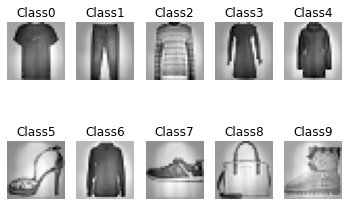

In [326]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    image = pca_df.loc[pca_df['label']==i].to_numpy()[1,:784].reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.title('Class'+str(i))
    plt.show

In [21]:
def knn_20(train, test, dist='euclidean'):
    train_label = train['label'].copy()
    train_nl = train.copy().drop(columns=['label'])
    test_label = test['label'].copy()
    test_nl = test.copy().drop(columns=['label'])
    neigh = KNeighborsClassifier(n_neighbors=20, metric=dist)
    neigh.fit(train_nl, train_label)
    predict=neigh.predict(test_nl)
    return predict

In [164]:
def tts_by_class(data, n): 
    train = data.loc[df_pca['label']==0][:3000]
    for i in range(1,10):
        train_row = data.loc[data['label']==i][:3000]
        train = train.append(train_row)
    test = data.loc[data.index.difference(train.index)]
    return train, test

In [296]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
def acc_bar(predict, test):
    test_label = test['label'].copy()
    global_acc=sum(predict==np.array(test_label))/len(test)
    class_acc=[]
    test_wp=test.copy()
    test_wp['predict'] = predict.tolist()
    for i in range(10):
        c = test_wp.loc[test['label']==i]
        accuracy=sum(np.array(c['label'])==c['predict'])/len(c)
        class_acc.append(accuracy)
    accuracy = [*class_acc,global_acc]
    index = ['Class'+str(x) for x in range(10)]
    index.append('global')
    fig, ax = plt.subplots(figsize=(9, 3))
    my_cmap = plt.cm.get_cmap('GnBu')
    colors = my_cmap(accuracy)
    rects = ax.bar(index, accuracy, color=colors)
    addlabels(index, accuracy)
    sm = ScalarMappable(cmap=my_cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Accuracy', rotation=270,labelpad=25)
    plt.title('Global Accuracy and Class Accuracy')
    plt.xticks(index)  
    plt.ylabel('Accuracy')
    x, y, text = 8, 2, "text outside plot"
    plt.savefig("bar_chart_with_colorbar_03.png", bbox_inches='tight')
    plt.show()

In [297]:
train_pca, test_pca = tts_by_class(pca_df, 3000)

In [181]:
test_labels_pca = test_pca['label'].to_numpy()

In [182]:
pred_pca = knn_20(train_pca, test_pca)

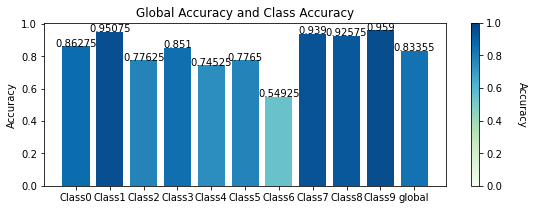

In [298]:
acc_bar(pred_pca, test_pca)

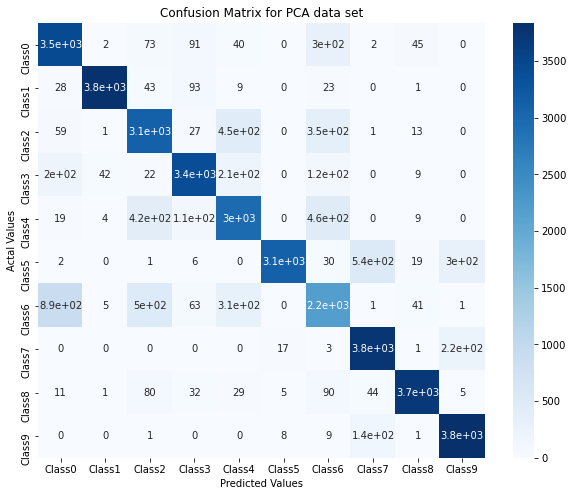

In [300]:
from operator import truediv
cm = confusion_matrix(test_labels_pca, pred_pca) 
cm_df = pd.DataFrame(cm,
                     index = ['Class'+str(x) for x in range(10)], 
                     columns = ['Class' + str(x) for x in range(10)])
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title('Confusion Matrix for PCA data set')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [178]:
train_ori, test_ori = tts_by_class(fashion_data, 3000)

In [179]:
test_labels_ori = test_ori['label'].to_numpy()

In [180]:
pred_ori = knn_20(train_ori, test_ori)

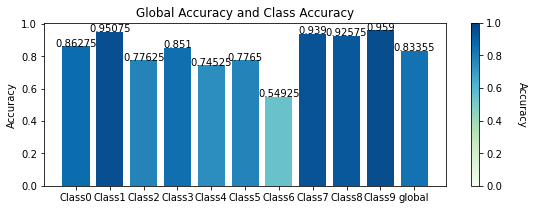

In [299]:
acc_bar(pred_ori, test_ori)

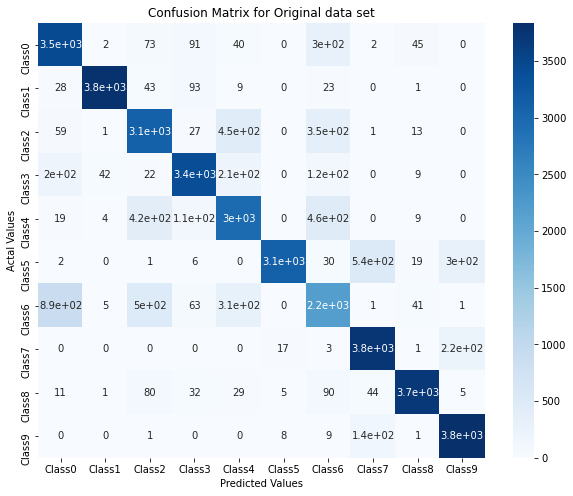

In [292]:
cm_ori = confusion_matrix(test_labels_ori, pred_ori) 
cm_df_ori = pd.DataFrame(cm_ori,
                     index = ['Class'+str(x) for x in range(10)], 
                     columns = ['Class' + str(x) for x in range(10)])
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title('Confusion Matrix for Original data set')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()